# US YouTube Trending Videos Analysis

## Introduction

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for. In our analysis, we will only look at trending videos data in the U.S..

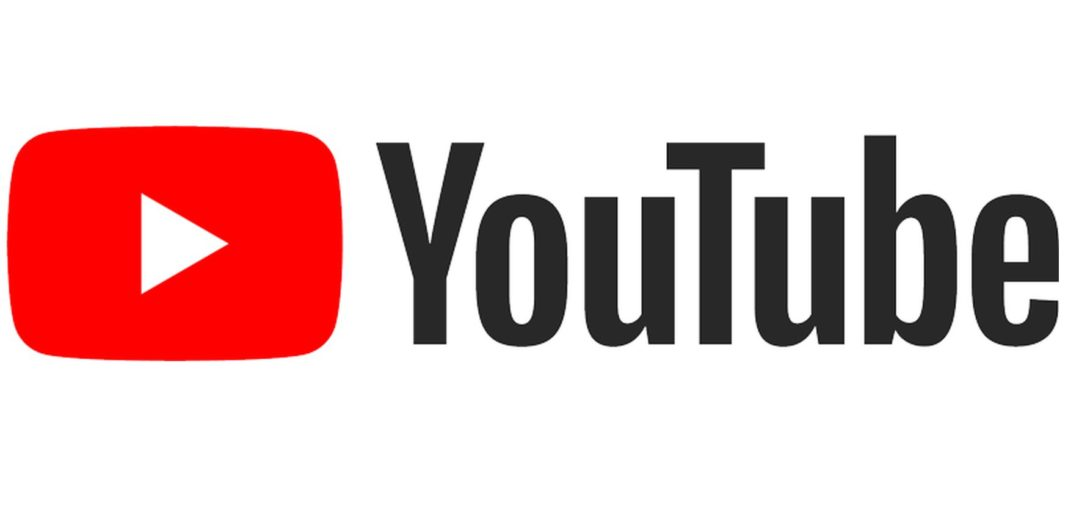

## Goals of the analysis

By analysing the data, we want to address the following questions:

- Which category has the largest number of trending videos?

- Which category has the largest number of total views/likes/dislikes/comments?

- How many views, likes, dislikes, and comments do our trending videos have? Do videos with larger number of views also have larger number of likes, dislikes and comments? Is there relationships between views and likes/dislikes/comments?

- What are the top 10 Viewed/Liked/Disliked/Commented Videos?

- Which YouTube channel have the largest number of trending videos?

- What's the most common title lengths of the trending videos? Are there any relationships between title lengths and number of views/likes/dislikes/comments? 

- What are some most frequent appeared words in video titles? What are some most frequent appeared words in video tags? 

- When were trending videos pubulished? What years? What months? On which days of the week? Is there any difference between number of videos published in weekdays and weekends? At which times od the day? Did authors have any specific times that they would like to publish?

- How much time passed between the videos published and trending?

- What proportion of videos prevent users to comment? What proportion of videos prevent users to rate?

## Importing libraries and data

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud
import datetime as dt

In [3]:
df = pd.read_csv("USvideos.csv",encoding='latin-1')

In [4]:
#get a feel about the data
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO Ð¦ \n\nSUBSCRIBE Ð¼ ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
print(df.shape)
print(df.nunique())

(40949, 16)
video_id                   6282
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [6]:
#check for Nulls and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

We can see that there are `40949` entires and `16` variables in the dataset. All columns are complete except `description` column which has some `null` values 

## Data Cleaning

The `description` column has some null values. We can see that null values are denoted by `NaN`. In order to get rid of those null values, we replace each null value with an empty string.

In [7]:
df[df['description'].apply(lambda x: pd.isna(x))].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights åá YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights åá YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


In [8]:
df['description'] = df['description'].fillna('')

We also notice that we only have `category_id` in the dataset. We want to pair every category_id with the corresponding category

In [9]:
np.sort(df['category_id'].unique())

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43])

In [10]:
df['category_names'] = np.nan

df.loc[(df['category_id'] == 1), 'category_names'] = 'Film & Animation'
df.loc[(df['category_id'] == 2), 'category_names'] = 'Autos & Vehicles'
df.loc[(df['category_id'] == 10), 'category_names'] = 'Music'
df.loc[(df['category_id'] == 15), 'category_names'] = 'Pets & Animals'
df.loc[(df['category_id'] == 17), 'category_names'] = 'Sports'
df.loc[(df['category_id'] == 19), 'category_names'] = 'Travel & Events'
df.loc[(df['category_id'] == 20), 'category_names'] = 'Gaming'
df.loc[(df['category_id'] == 22), 'category_names'] = 'People & Blogs'
df.loc[(df['category_id'] == 23), 'category_names'] = 'Comedy'
df.loc[(df['category_id'] == 24), 'category_names'] = 'Entertainment'
df.loc[(df['category_id'] == 25), 'category_names'] = 'news & Potilics'
df.loc[(df['category_id'] == 26), 'category_names'] = 'Howto & Style'
df.loc[(df['category_id'] == 27), 'category_names'] = 'Education'
df.loc[(df['category_id'] == 28), 'category_names'] = 'Science & Technology'
df.loc[(df['category_id'] == 29), 'category_names'] = 'Nonprofits & Activism'
df.loc[(df['category_id'] == 43), 'category_names'] = 'Shows'

## Looking the views, likes, dislikes distribution by category_name

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
news & Potilics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category_names, dtype: int64


<Figure size 1440x720 with 0 Axes>

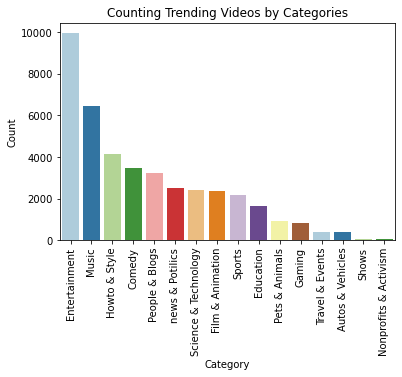

In [11]:
count_by_category = df['category_names'].value_counts()
print(count_by_category)

df_category = df['category_names'].value_counts().to_frame().reset_index()
df_category.rename(columns={'index':'category_names','category_names':'count'}, inplace=True)

plt.figure(figsize=(20,10))

g = plt.subplots()
g = sns.barplot(x='category_names', y='count',data=df_category, palette='Paired')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Counting Trending Videos by Categories')
g.set_xlabel('Category')
g.set_ylabel('Count')

plt.show()

We can see that the `Entertainment` category contains the largest number of trending videos, followed by `Music` and `Howto&Style` category.

Now we want to look at total number of views, likes, dislikes, and comments grouped by categories and see if there is a relationship among those data.

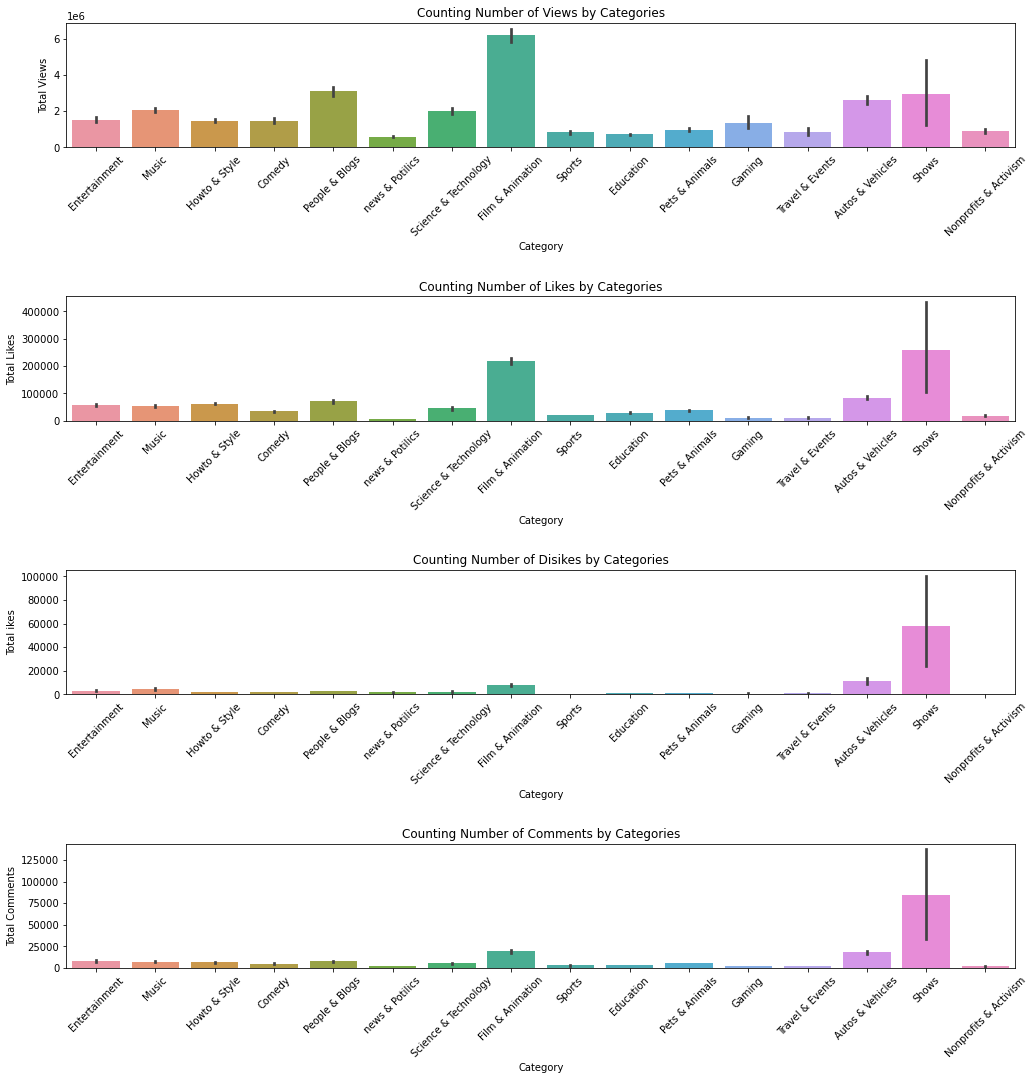

In [12]:
plt.figure(figsize=(17,15))

plt.subplot(411)
g1 = sns.barplot(x='category_names', y='views', data=df)
g1.set_xticklabels(g.get_xticklabels(), rotation=45)
g1.set_title('Counting Number of Views by Categories')
g1.set_xlabel('Category')
g1.set_ylabel('Total Views')

plt.subplot(412)
g2 = sns.barplot(x='category_names', y='likes', data=df)
g2.set_xticklabels(g.get_xticklabels(), rotation=45)
g2.set_title('Counting Number of Likes by Categories')
g2.set_xlabel('Category')
g2.set_ylabel('Total Likes')

plt.subplot(413)
g3 = sns.barplot(x='category_names', y='dislikes', data=df)
g3.set_xticklabels(g.get_xticklabels(), rotation=45)
g3.set_title('Counting Number of Disikes by Categories')
g3.set_xlabel('Category')
g3.set_ylabel('Total ikes')

plt.subplot(414)
g4 = sns.barplot(x='category_names', y='comment_count', data=df)
g4.set_xticklabels(g.get_xticklabels(), rotation=45)
g4.set_title('Counting Number of Comments by Categories')
g4.set_xlabel('Category')
g4.set_ylabel('Total Comments')

plt.subplots_adjust(hspace=1.2, top=1)

plt.show()

By looking at the barplots, we can see that those categories which have more trending videos do not necessarily imply that the have more total number of likes, dislikes, and comments. 

However, it seems that total number of views has positive relationships with total number of likes, dislikes, and comments. In other words, usually higher total number of views results in higher total number of likes, dislikes and comments. In order to see the relationships clearly, we will look at the percent of likes, dislikes and comments respect to number of views further deeper.

## Are there any correlations between views, likes, dislikes, and comments?

In [13]:
df['like_rate'] = df['likes']/df['views'] * 100
df['dislike_rate'] = df['dislikes']/df['views'] * 100
df['comment_rate'] = df['comment_count']/df['views'] * 100

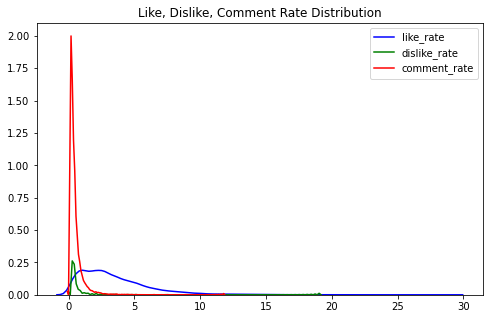

In [14]:
plt.figure(figsize = (8,5))

g1 = sns.distplot(df['like_rate'], color='blue', hist=False, label='like_rate')
g1 = sns.distplot(df['dislike_rate'], color='green', hist=False, label='dislike_rate')
g1 = sns.distplot(df['comment_rate'], color='red', hist=False, label='comment_rate')
g1.set_title('Like, Dislike, Comment Rate Distribution')
g1.set_xlabel('')
plt.legend()
plt.show()

From the distribution plot, we can see that `dislike_rate` and `comment_rate` have very similar distribution. It may indicate that people tend to express their dislikes towards some videos in the comments. It is also interesting to notice that the distribution of `like_rate` and `dislike_rate` are very different. The mean and the standard deviation of the `like_rate` are higher than `dislike_rate`.

We can also see the relationships between categories, views, likes, dislikes, and comments by looking at the correlation matrix.

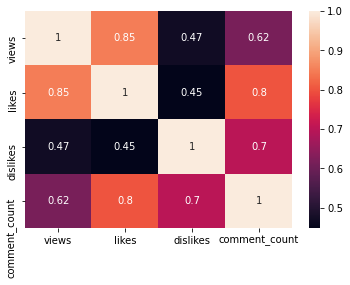

In [15]:
sns.heatmap(df[['views','likes','dislikes','comment_count']].corr(),
           annot=True)
plt.show()

It shows we have a high positive correlation between views and likes, indicating that videos with higher total number of views have more likes. However, the correlation between views and dislikes is not that high. Also, the correlations between likes and comments, and dislikes and comments are also very high.

## Top 10 Viewed/Liked/Disliked/Commented Videos 

We now want to create a list of top 10 viewd/liked/disliked/commented videos.

In [16]:
df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,category_names
count,40949,40949,40949,40949,40949,40949,40949,40949,40949
unique,6282,205,6455,2207,6269,6055,6352,6902,16
top,#NAME?,18.23.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,,Entertainment
freq,397,200,30,203,50,1535,30,570,9964


From `video_id` description, we can see that there are total of 40949 videos, but there are 6351 unique `video_id`. This indicates that some videos were on the trending videos list more than one day.In order to get top viewd/liked/disliked/commented videos list, we have to only allow the same video appear once.

Top 10 viewed videos:

In [17]:
df_views = df.sort_values(by='views',ascending=False)
df_views_new = df_views.drop_duplicates('video_id',keep='last')
df_views_new[['title','views','category_names','description']].head(10)

,title,views,category_names,description
35550,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV,39349927,Music,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MVD...
28605,TWICE What is Love? M/V,38873543,Music,TWICE(_üªÛ«__) What is Love? M/V\n\nSpoti...
3200,Marvel Studios' Avengers: Infinity War Officia...,37736281,Entertainment,There was an ideaÛ_ Avengers: Infinity War. I...
70,Ed Sheeran - Perfect (Official Music Video),33523622,Music,_Ù_¤: https://ad.gt/yt-perfect\n_ÙÕ¡: https://...
33351,Childish Gambino - This Is America (Official V...,31648454,Music,ÛÏThis is AmericaÛ by Childish Gambino http...
30750,VENOM - Official Trailer (HD),27973210,Entertainment,We Are #Venom. 10.5.18\n\nOne of Marvel's most...
4600,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24782158,Entertainment,"YouTube Rewind 2017. Celebrating the videos, p..."
28624,Drake - Nice For What,24421448,Music,Music video by Drake performing Nice For What....
38161,Sanju | Official Trailer | Ranbir Kapoor | Raj...,23758250,Entertainment,Few lives in our times are as dramatic and eni...
16181,To Our Daughter,20921796,People & Blogs,Directed by Tyler Ross @wttyler\nMusic by Jaco...


Top 10 liked videos:

In [18]:
df_likes = df.sort_values(by='likes',ascending=False)
df_likes_new = df_likes.drop_duplicates('video_id',keep='last')
df_likes_new[['title','likes','category_names','description']].head(10)

,title,likes,category_names,description
35550,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV,3880071,Music,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MVD...
2201,BTS (¡©Äã ÎÉãÜ¬) 'MIC Drop (Steve Aoki Re...,2055137,Music,BTS (¡©Äã ÎÉãÜ¬) 'MIC Drop (Steve Aoki Re...
21173,j-hope 'Daydream (¡±_»_)' MV,2050527,Music,j-hope 'Daydream (¡±_»_)'\n\n\nj-hope's 'D...
33151,BTS (¡©Äã ÎÉãÜ¬) LOVE YOURSELF _ä Tear '...,1956202,Music,BTS (¡©Äã ÎÉãÜ¬) LOVE YOURSELF _ä Tear '...
3200,Marvel Studios' Avengers: Infinity War Officia...,1735895,Entertainment,There was an ideaÛ_ Avengers: Infinity War. I...
70,Ed Sheeran - Perfect (Official Music Video),1634124,Music,_Ù_¤: https://ad.gt/yt-perfect\n_ÙÕ¡: https://...
28156,BTS (¡©Äã ÎÉãÜ¬) 'Euphoria : Theme of LOV...,1572997,Music,BTS (¡©Äã ÎÉãÜ¬) 'Euphoria : Theme of LOV...
38352,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV ...,1437859,Music,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV ...
33351,Childish Gambino - This Is America (Official V...,1405355,Music,ÛÏThis is AmericaÛ by Childish Gambino http...
22174,j-hope 'Airplane' MV,1401915,Music,j-hope 'Airplane' MV\n\n\n\nj-hope - 'Hope Wor...


Top 10 disliked videos:

In [19]:
df_dislikes = df.sort_values(by='likes',ascending=False).drop_duplicates('video_id',keep='last')
df_dislikes[['title','dislikes','category_names','description']].head(10)

,title,dislikes,category_names,description
35550,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV,72707,Music,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MVD...
2201,BTS (¡©Äã ÎÉãÜ¬) 'MIC Drop (Steve Aoki Re...,23888,Music,BTS (¡©Äã ÎÉãÜ¬) 'MIC Drop (Steve Aoki Re...
21173,j-hope 'Daydream (¡±_»_)' MV,14711,Music,j-hope 'Daydream (¡±_»_)'\n\n\nj-hope's 'D...
33151,BTS (¡©Äã ÎÉãÜ¬) LOVE YOURSELF _ä Tear '...,13966,Music,BTS (¡©Äã ÎÉãÜ¬) LOVE YOURSELF _ä Tear '...
3200,Marvel Studios' Avengers: Infinity War Officia...,21969,Entertainment,There was an ideaÛ_ Avengers: Infinity War. I...
70,Ed Sheeran - Perfect (Official Music Video),21082,Music,_Ù_¤: https://ad.gt/yt-perfect\n_ÙÕ¡: https://...
28156,BTS (¡©Äã ÎÉãÜ¬) 'Euphoria : Theme of LOV...,8113,Music,BTS (¡©Äã ÎÉãÜ¬) 'Euphoria : Theme of LOV...
38352,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV ...,6390,Music,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV ...
33351,Childish Gambino - This Is America (Official V...,51547,Music,ÛÏThis is AmericaÛ by Childish Gambino http...
22174,j-hope 'Airplane' MV,6268,Music,j-hope 'Airplane' MV\n\n\n\nj-hope - 'Hope Wor...


Top 10 commented videos:

In [20]:
df_comment = df.sort_values(by='comment_count',ascending=False).drop_duplicates('video_id',keep='last')
df_comment[['title','comment_count','category_names','description']].head(10)

,title,comment_count,category_names,description
10000,So Sorry.,733373,Entertainment,
35550,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MV,692305,Music,BTS (¡©Äã ÎÉãÜ¬) 'FAKE LOVE' Official MVD...
4600,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,462103,Entertainment,"YouTube Rewind 2017. Celebrating the videos, p..."
16825,LOGAN PAUL IS BACK!,432534,Entertainment,Do It Different. Be a Maverick Ð¼ https://Sho...
2201,BTS (¡©Äã ÎÉãÜ¬) 'MIC Drop (Steve Aoki Re...,395562,Music,BTS (¡©Äã ÎÉãÜ¬) 'MIC Drop (Steve Aoki Re...
21173,j-hope 'Daydream (¡±_»_)' MV,387384,Music,j-hope 'Daydream (¡±_»_)'\n\n\nj-hope's 'D...
14000,Suicide: Be Here Tomorrow.,363133,Nonprofits & Activism,National Suicide Prevention Lifeline\nCall 1-8...
28962,Melting Every Lipstick From Sephora Together,321455,People & Blogs,We melted one of every lipstick from Sephora t...
33151,BTS (¡©Äã ÎÉãÜ¬) LOVE YOURSELF _ä Tear '...,285583,Music,BTS (¡©Äã ÎÉãÜ¬) LOVE YOURSELF _ä Tear '...
3200,Marvel Studios' Avengers: Infinity War Officia...,241237,Entertainment,There was an ideaÛ_ Avengers: Infinity War. I...


Interesting fact: Top 10 liked videos list is the same as the top 10 disliked videos.

## Which channels have the largest number of trending videos?

In [21]:
df_channel = df.groupby('channel_title').size().reset_index(name='video_count')
df_channel.sort_values('video_count', ascending=False).head(10)

,channel_title,video_count
555,ESPN,203
1785,The Tonight Show Starring Jimmy Fallon,197
1804,TheEllenShow,193
1943,Vox,193
1271,Netflix,193
1753,The Late Show with Stephen Colbert,187
889,Jimmy Kimmel Live,186
1009,Late Night with Seth Meyers,183
1556,Screen Junkies,182
1239,NBA,181


## Video Title Lengths

In this section, we want to know if length of the video titles matters in terms of being chosen as the trending videos.

The mean of the title length is:  48.95328335246282
The median of the title length is:  47.0
The longest title length is:  141
The shortest title length is:  3


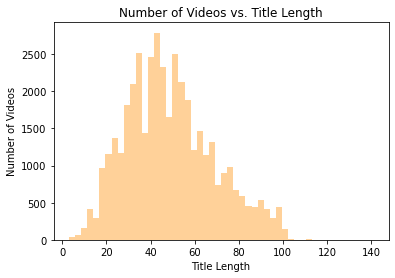

In [22]:
df['title_length'] = df['title'].apply(lambda x: len(x))

print('The mean of the title length is: ', np.mean(df['title_length']))
print('The median of the title length is: ', np.median(df['title_length']))
print('The longest title length is: ', np.max(df['title_length']))
print('The shortest title length is: ', np.min(df['title_length']))

g = sns.distplot(df['title_length'], color='darkorange', kde=False)
g.set(xlabel='Title Length', ylabel='Number of Videos', title='Number of Videos vs. Title Length')
plt.show()

From the plot we can see that `title_length` distribution follows a normal distribution. The mean of the `title_length` is `48.5` characters and the median is `46`. 

We will then look at if there is a relationship between title length and number of views, likes, dislikes, and comments.

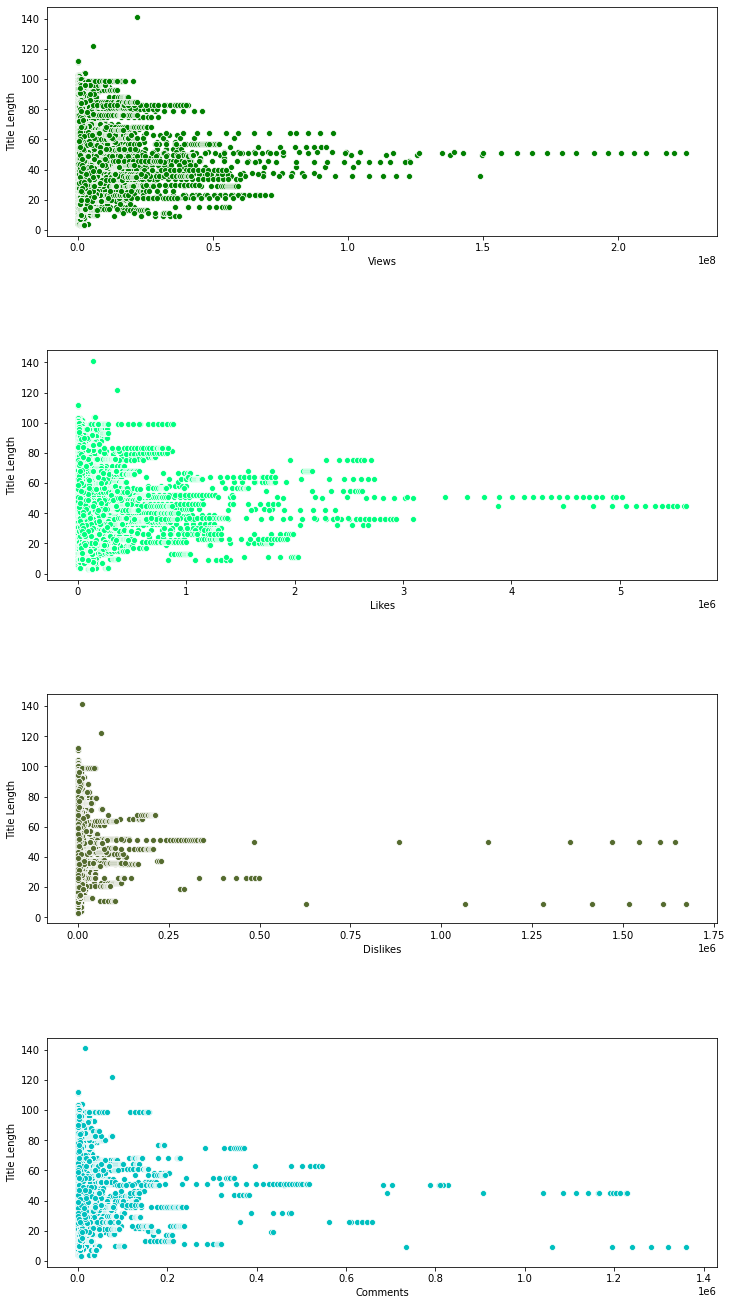

In [23]:
plt.figure(figsize=(12,20))

plt.subplot(411)
g1 = sns.scatterplot(x='views', y='title_length', data=df, color='green')
g1.set_xlabel('Views')
g1.set_ylabel('Title Length')

plt.subplot(412)
g2 = sns.scatterplot(x='likes', y='title_length', data=df, color='springgreen')
g2.set_xlabel('Likes')
g2.set_ylabel('Title Length')

plt.subplot(413)
g3 = sns.scatterplot(x='dislikes', y='title_length', data=df, color='darkolivegreen')
g3.set_xlabel('Dislikes')
g3.set_ylabel('Title Length')

plt.subplot(414)
g4 = sns.scatterplot(x='comment_count', y='title_length', data=df, color='c')
g4.set_xlabel('Comments')
g4.set_ylabel('Title Length')

plt.subplots_adjust(hspace=0.5, top=1)

plt.show()

By looking at the plots, we find videos with large number of views (over `140,000,000`) usually have title length around `50`. Videos with title length around `40` and `60` have more likes. Videos with title length around `10` have more dislikes and comments. 

## Most Common Words in Video Titles

Let us now find out what are some popular words in Video Titles.

In [35]:
words_list = list(df['title'].apply(lambda x: x.split()))
words_list = [word for words in words_list for word in words]
Counter(words_list).most_common(30)

[('-', 11452),
 ('|', 10663),
 ('The', 5750),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017),
 ('In', 943),
 ('With', 897),
 ('Is', 828),
 ('at', 826),
 ('What', 773)]

From the above output, we can see that trending videos tend to use "-" and "|" symbols often, that may because such symbols can let them seperate some key words in their titles to make them appealing. Besides some words like "and" and "the", we can use some meaningful words such as "Trailer", "official", "2018" to guess some contents of the trending videos.

In addition, we can visualize the result by creating a word cloud.

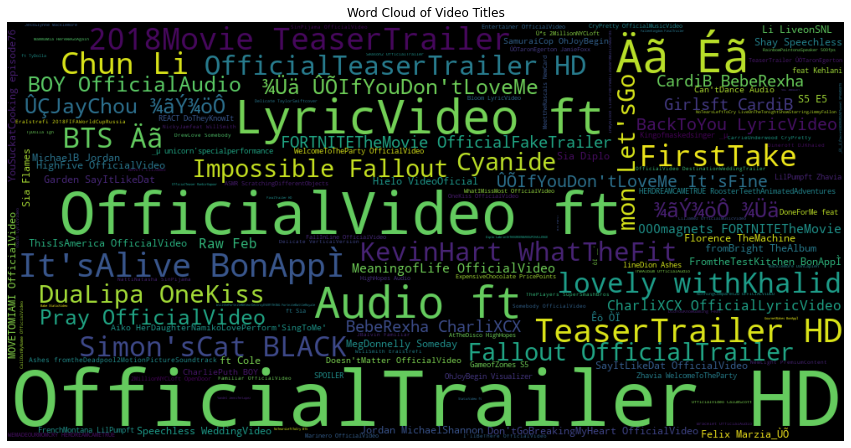

In [45]:
word_cloud = WordCloud(width=1000, height=500,
                     background_color='black',
                     max_font_size=100,
                     random_state=1).generate(''.join(words_list))
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.title('Word Cloud of Video Titles')
plt.axis('off')
plt.show()

## Most Common Tags

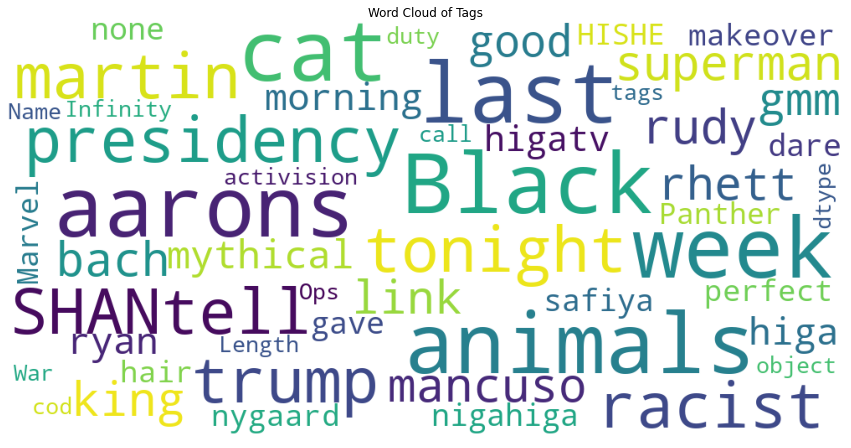

In [70]:
word_cloud = WordCloud(width=1000, height=500,
                     background_color='white',
                     max_font_size=100,
                     random_state=1).generate(str(df['tags']))

plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.title('Word Cloud of Tags')
plt.axis('off')
plt.show()

From our word cloud, we can use those frequent keywords to get a sense about what people were interested in at that time.

## Publish Time and Trending Time

First let's get a sense about when these videos were published and when they were in the trending list.

In [84]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month

2018    30279
2017    10428
2013       44
2015       35
2016       35
2014       32
2011       27
2012       24
2010       19
2009       14
2008       11
2006        1
Name: publish_year, dtype: int64


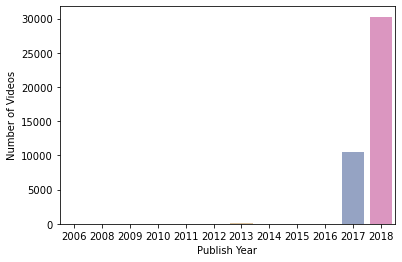

In [87]:
plt.subplot()
g = sns.countplot('publish_year', data=df, palette='Set2')
g.set(xlabel='Publishing Year', ylabel='Number of Videos')
plt.show()

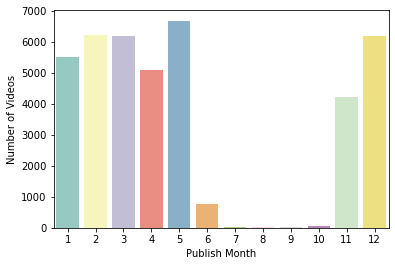

In [90]:
plt.subplot()
g = sns.countplot('publish_month', data=df, palette='Set3')
g.set(xlabel='Publishing Month', ylabel='Number of Videos')
plt.show()

Most Videos were published in 2017 and 2018. Few videos were published in July, August, September, and October, some of them were published in June, and many of them were published during January through May, November and December. 

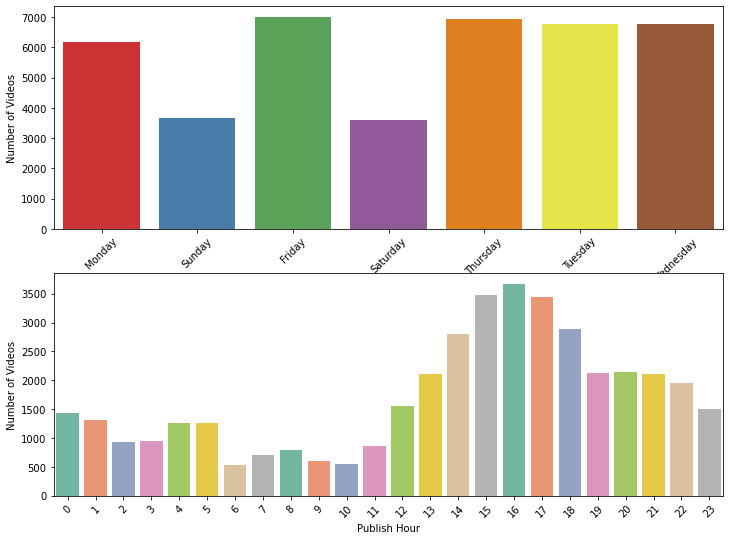

In [107]:
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_hour'] = df['publish_time'].dt.hour

plt.figure(figsize=(12,9))

plt.subplot(211)
g = sns.countplot('publishing_day', data=df, palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(xlabel='Publish Day', ylabel='Number of Videos')

plt.subplot(212)
g = sns.countplot('publishing_hour', data=df, palette='Set2')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set(xlabel='Publish Hour', ylabel='Number of Videos')

plt.show()

We can see that the number of trending videos published on Saturday and Sunday are less than the number of trending videos published on weekdays. In terms of the publishhing hour, there is a peek between 2pm and 18pm. We can also see that from 12am till 11am, there weren't too many trending videos being published.

Now we want to explore the time gaps between the trending videos being published and being on the trending list.

In [173]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_date'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%d')

df['day_gap'] = (df['trending_date'].dt.date - df['publish_date'].dt.date)
df['day_gap'] = df['day_gap'].dt.days.astype('int16')

In [201]:
df['day_gap'].value_counts(bins=150)

(-4.216, 28.1]      40554
(28.1, 56.2]           83
(56.2, 84.3]           18
(1264.5, 1292.6]       15
(84.3, 112.4]          12
                    ...  
(1573.6, 1601.7]        0
(1601.7, 1629.8]        0
(3119.1, 3147.2]        0
(3062.9, 3091.0]        0
(2079.4, 2107.5]        0
Name: day_gap, Length: 150, dtype: int64

Since we cannot count and plot all the day gaps between publishing dates and trending dates, and the gaps are mostly in the interval of `(-4.216, 28.1)`, we will only look at gaps between 0 and 30.

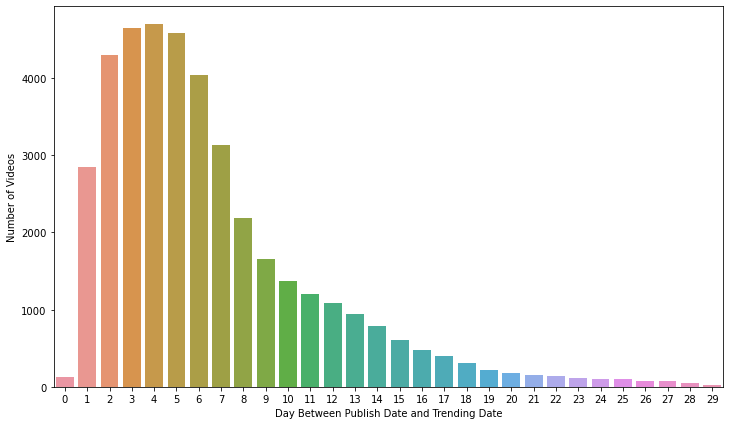

In [203]:
df_new = df.loc[df['day_gap'] < 30]

plt.figure(figsize=(12,7))

plt.subplot()
g = sns.countplot('day_gap', data=df_new)
g.set(xlabel='Day Between Publish Date and Trending Date', ylabel='Number of Videos')
plt.show()

As we can see, most of videos were on the trending list within 10 days of publishing. As time went by, there was less chance that the videos would be on the trending list.

## Trending Videos with Comment-disabled and Rating-disabled

In this section, we will look at the percentage of comment-disabled videos and rating-disabled videos.

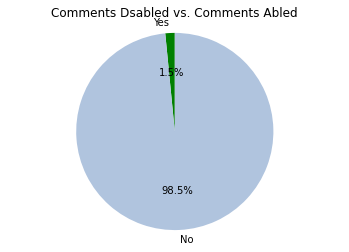

In [218]:
count1 = df['comments_disabled'].value_counts().to_dict()

fig1, ax1 = plt.subplots()
ax1.pie(x=[count1[True], count1[False]], labels=['Yes','No'],
        autopct='%1.1f%%', startangle=90, colors=['g','lightsteelblue'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Comments Dsabled vs. Comments Abled')

plt.show()

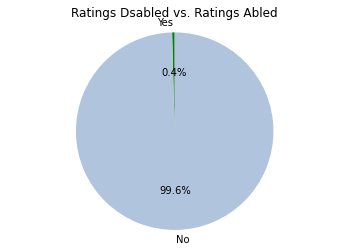

In [219]:
count2 = df['ratings_disabled'].value_counts().to_dict()

fig2, ax2 = plt.subplots()
ax2.pie(x=[count2[True], count2[False]], labels=['Yes','No'],
        autopct='%1.1f%%', startangle=90, colors=['g','lightsteelblue'])
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Ratings Dsabled vs. Ratings Abled')

plt.show()

There are only 1.5% trending videos prevented users from making comments and 0.4% trending videos prevented users from ratings.